In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
len(X_train)

60000

In [6]:
len(y_train)

60000

In [9]:
X_train[0].shape

(28, 28)

labels is 5


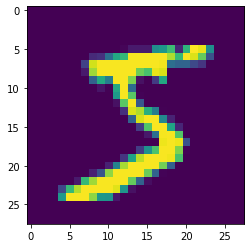

In [14]:
plt.imshow(X_train[0])
print("labels is" , y_train[0])

In [15]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

In [52]:
X_train_flatten=X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test_flatten=X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])

In [22]:
X_train_flatten.shape

(60000, 784)

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7163 - accuracy: 0.5873
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5640 - accuracy: 0.8570
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4102 - accuracy: 0.8890
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3550 - accuracy: 0.9010
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3255 - accuracy: 0.9062


In [48]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 799us/step - loss: 0.3037 - accuracy: 0.9132


[0.303653359413147, 0.9132000207901001]

# Trying to normalize vlaues and train model again 

In [53]:
X_train_flatten=X_train_flatten/255
X_test_flatten=X_test_flatten/255

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4585 - accuracy: 0.8708
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1299 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0625 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0514 - accuracy: 0.9847


In [55]:
model.evaluate(X_test_flatten,y_test)


313/313 [==============================] - 0s 866us/step - loss: 0.0791 - accuracy: 0.9764


[0.07912393659353256, 0.9764000177383423]

In [57]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

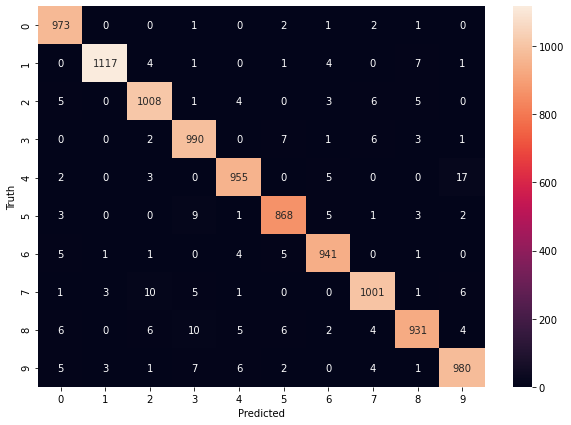

In [58]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')